In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default data

Dataset

In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/KLTN/data/train.csv')

In [7]:
train_data.shape

(159571, 8)

In [8]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Check missing value

In [9]:
train_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Length of comment

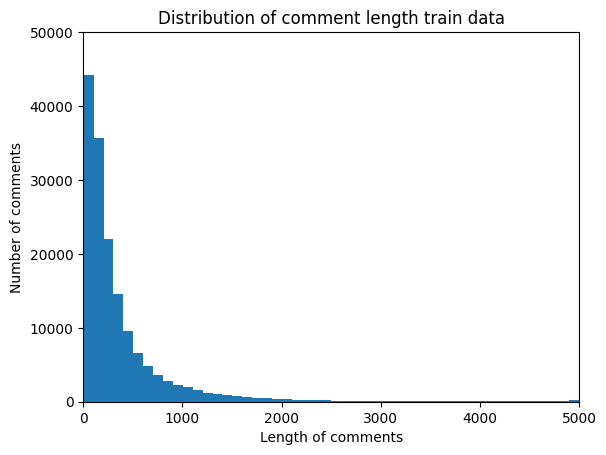

In [10]:
# length of comments
comments = train_data['comment_text']

plt.hist([len(comment) for comment in comments], bins=50)
plt.xlabel('Length of comments')
plt.xlim(0, 5000)
plt.ylabel('Number of comments')
plt.ylim(0, 50000)
plt.title('Distribution of comment length train data')
plt.show()

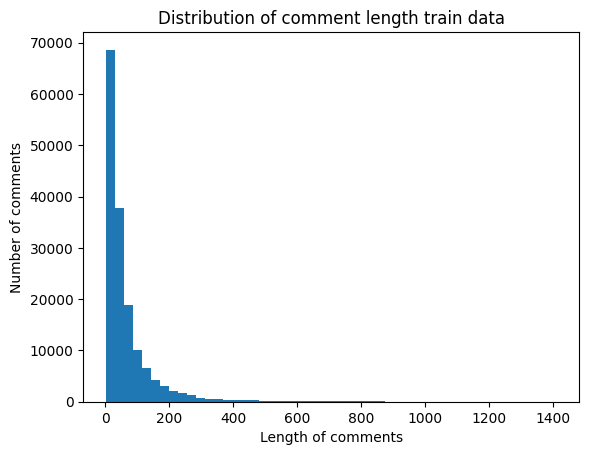

In [11]:
# length of comments
comments = train_data['comment_text']

plt.hist([len(comment.split()) for comment in comments], bins=50)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.title('Distribution of comment length train data')
plt.show()

In [12]:
detection_classes = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate",
]
target_classes = train_data[detection_classes].values

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

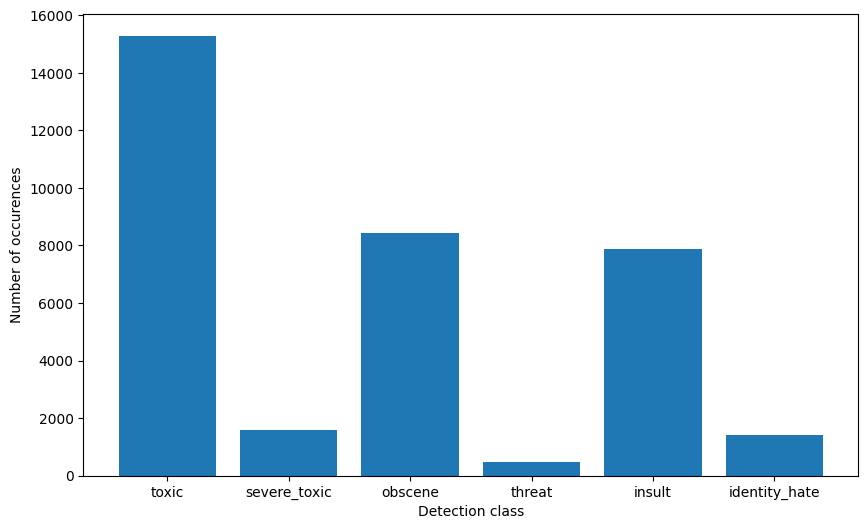

In [13]:
occurences = []

for detection_class in detection_classes:
    occurences.append(train_data[detection_class].sum())
    plt.figure(figsize=(10, 6))

plt.bar(detection_classes, occurences)
plt.xlabel('Detection class')
plt.ylabel('Number of occurences')
plt.show()

<ipython-input-14-07e1c2732de7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowsums = train_data.iloc[:,:].sum(axis=1)


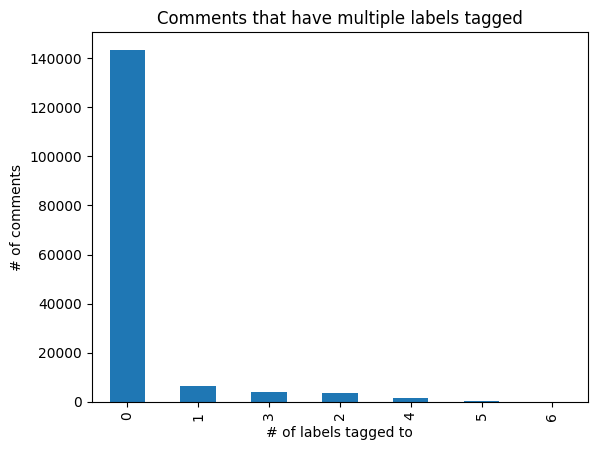

89.83211235124176 % comments have no labels associated to them.


In [14]:
rowsums = train_data.iloc[:,:].sum(axis=1)
valcount = rowsums.value_counts()
valcount.plot.bar()
plt.xlabel("# of labels tagged to")
plt.ylabel("# of comments")
plt.title("Comments that have multiple labels tagged")
plt.show()

print(valcount[0]*100/sum(valcount),"% comments have no labels associated to them.")

In [15]:
for detection_class in detection_classes:
    print(f"Number of occurences of {detection_class}: {train_data[detection_class].sum()}")

Number of occurences of toxic: 15294
Number of occurences of severe_toxic: 1595
Number of occurences of obscene: 8449
Number of occurences of threat: 478
Number of occurences of insult: 7877
Number of occurences of identity_hate: 1405


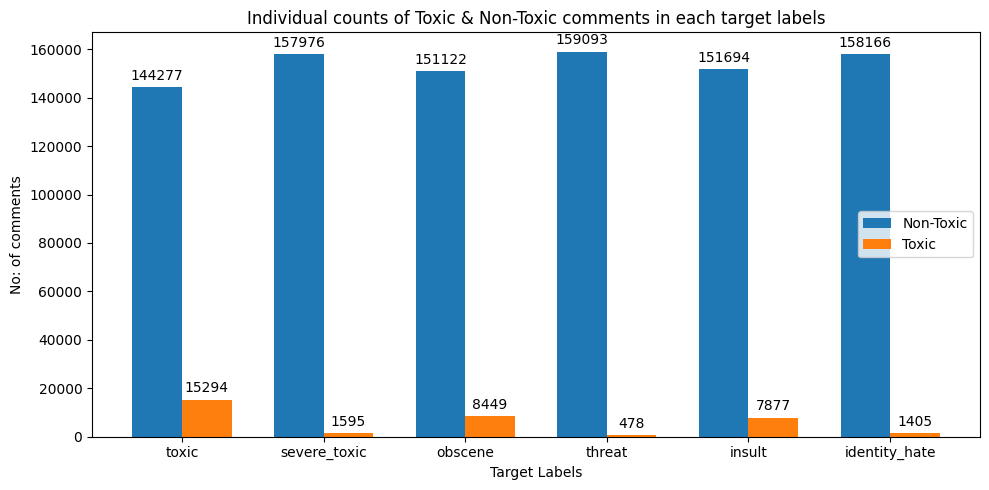

In [16]:
# checking the value counts for each targets individually
class_0=[]
class_1=[]

for detection_class in detection_classes:
    val_count =  train_data[detection_class].value_counts()
    class_0.append(val_count[0])
    class_1.append(val_count[1])

x = np.arange(len(detection_classes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - width/2, class_0, width, label='Non-Toxic')
rects2 = ax.bar(x + width/2, class_1, width, label='Toxic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No: of comments')
ax.set_xlabel("Target Labels")
ax.set_title('Individual counts of Toxic & Non-Toxic comments in each target labels')
ax.set_xticks(x)
ax.set_xticklabels(detection_classes)
ax.legend(loc=7)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.bar
fig.tight_layout()

plt.show()

# After data augmention

In [31]:
train_data = pd.read_csv('/content/drive/MyDrive/KLTN/data/preprogress/train_clean_aug.csv').fillna('no comment')

In [32]:
train_data.shape

(224451, 11)

In [33]:
train_data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text,target
0,72531,c218d82a89df572a,"""\nWatch it: Palestinian national radio puts o...",1,0,1,0,1,1,watch palestinian national radio put out call ...,1
1,33352,58e66a3223ce6466,"Self-appointed, self-aggrandising and self-imp...",1,0,0,0,0,0,self appoint self aggrandise self important gu...,1
2,99983,172167501c93fe9f,"""\n\nWhy on earth do you think I give a fuck a...",1,0,1,0,0,0,earth think give fuck opinion especially wrong...,1
3,104039,2ca984b3dc59249b,Who made you sherrif you shitsack?,1,0,1,0,1,0,make sherrif shitsack,1
4,58697,9d3373992b529265,"""\n\nHey Rent, thanks for the suggestion. It's...",0,0,0,0,0,0,hey rent thank suggestion funny mention it by ...,0


Check missing value

In [34]:
train_data.isnull().sum()

Unnamed: 0       0
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
cleaned_text     0
target           0
dtype: int64

Length of comment

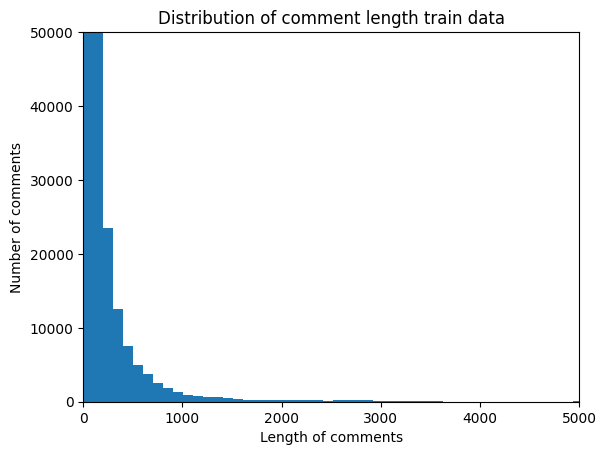

In [43]:
# length of comments
comments = train_data['cleaned_text'].fillna('no comment')

plt.hist([len(comment) for comment in comments], bins=50)
plt.xlabel('Length of comments')
plt.xlim(0, 5000)
plt.ylabel('Number of comments')
plt.ylim(0, 50000)
plt.title('Distribution of comment length train data')
plt.show()

In [45]:
train_data['count'] = comments.apply(lambda x: len(x))
total_rows = len(train_data)
rows_with_less_than_300_words = len(train_data[train_data['count'] < 3000])

print(f"Total: {comments}")
print(f"Row with 300 word: {rows_with_less_than_300_words/total_rows}")

Total: 0         watch palestinian national radio put out call ...
1         self appoint self aggrandise self important gu...
2         earth think give fuck opinion especially wrong...
3                                     make sherrif shitsack
4         hey rent thank suggestion funny mention it by ...
                                ...                        
224446    dp fuck hell think prepare line every football...
224447    dispute resolution please read wikipedia dispu...
224448                      bore bore gail full stop harass
224449    dear hj represent wikipedia censorship brigade...
224450    america saturday morning cartoon country not k...
Name: cleaned_text, Length: 224451, dtype: object
Row with 300 word: 0.9964045604608578


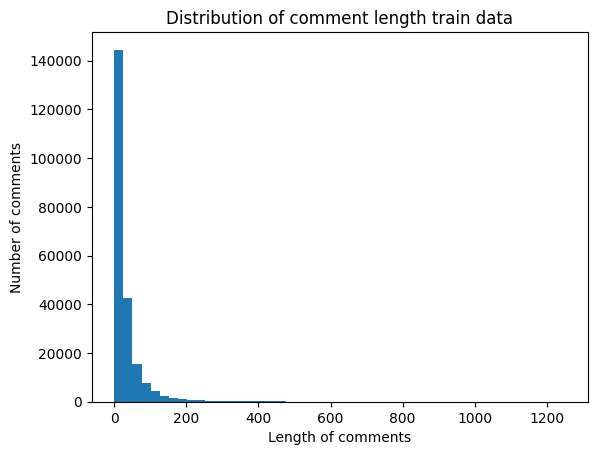

In [36]:
# length of comments
comments =train_data['cleaned_text'].fillna('no comment')

plt.hist([len(comment.split()) for comment in comments], bins=50)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.title('Distribution of comment length train data')
plt.show()

In [37]:
train_data['count'] = comments.apply(lambda x: len(x.split()))
total_rows = len(train_data)
rows_with_less_than_300_words = len(train_data[train_data['count'] < 300])

print(f"Total: {comments}")
print(f"Row with 300 word: {rows_with_less_than_300_words/total_rows}")

Total: 0         watch palestinian national radio put out call ...
1         self appoint self aggrandise self important gu...
2         earth think give fuck opinion especially wrong...
3                                     make sherrif shitsack
4         hey rent thank suggestion funny mention it by ...
                                ...                        
224446    dp fuck hell think prepare line every football...
224447    dispute resolution please read wikipedia dispu...
224448                      bore bore gail full stop harass
224449    dear hj represent wikipedia censorship brigade...
224450    america saturday morning cartoon country not k...
Name: cleaned_text, Length: 224451, dtype: object
Row with 300 word: 0.9880686653211614


In [38]:
detection_classes = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate",
]
target_classes = train_data[detection_classes].values

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

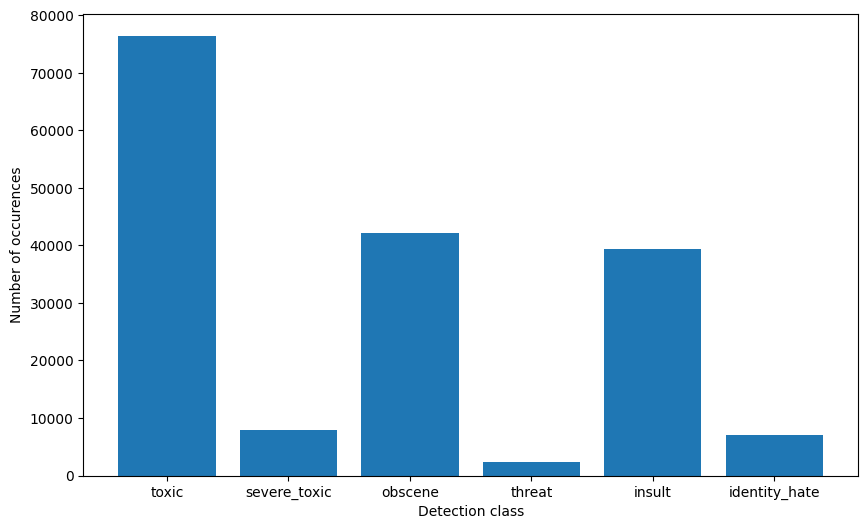

In [39]:
occurences = []

for detection_class in detection_classes:
    occurences.append(train_data[detection_class].sum())
    plt.figure(figsize=(10, 6))

plt.bar(detection_classes, occurences)
plt.xlabel('Detection class')
plt.ylabel('Number of occurences')
plt.show()

In [41]:
for detection_class in detection_classes:
    print(f"Number of occurences of {detection_class}: {train_data[detection_class].sum()}")

Number of occurences of toxic: 76450
Number of occurences of severe_toxic: 7971
Number of occurences of obscene: 42229
Number of occurences of threat: 2390
Number of occurences of insult: 39377
Number of occurences of identity_hate: 7017
